In [129]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [461]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2025-02-11 14:43:12,915 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:81:04:26:a3:64
2025-02-11 14:43:15,946 | INFO     |: Connected to c0:81:04:26:a3:64


In [9]:
ble.disconnect()

2025-02-04 15:18:09,517 | INFO     |: Disconnected from A1C0DD95-B611-6CFA-AF80-6BCF50487F59


In [430]:
ble.send_command(CMD.PING, "")

In [431]:
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

PONG


In [439]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [440]:
pitch_at_minus_90 = []
minus_90_times = []
def notification_handler(uuid, byte_array):
    t_t = ble.bytearray_to_string(byte_array).split(",")
    pitch_at_minus_90.append(t_t[0])
    minus_90_times.append(t_t[1])
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)
ble.send_command(CMD.SEND_DATA, "P")

In [442]:
print(len(pitch_at_minus_90))

1000


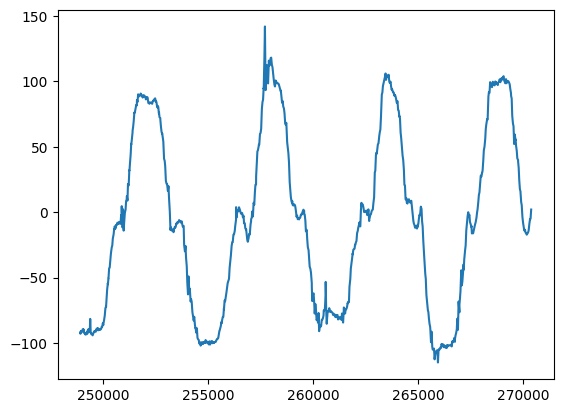

In [443]:
plt.plot(np.array(minus_90_times).astype(float), np.array(pitch_at_minus_90).astype(float))

In [18]:
def notification_handler(uuid, byte_array):
    t_t = ble.bytearray_to_string(byte_array).split(",")
    pitch_at_zero.append(t_t[0])
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)
ble.send_command(CMD.SEND_DATA, "P")

In [19]:
print(len(pitch_at_zero))

1000


In [22]:
pitch_at_90  = []
def notification_handler(uuid, byte_array):
    t_t = ble.bytearray_to_string(byte_array)
    pitch_at_90.append(t_t)
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)
ble.send_command(CMD.SEND_DATA, "P")

In [426]:
print(len(pitch_at_minus_90))

1000


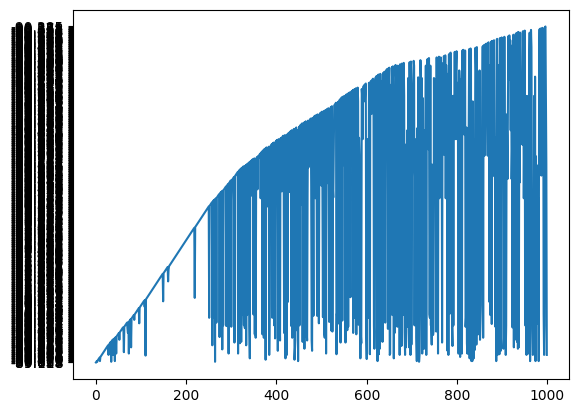

In [427]:
plt.plot(pitch_at_minus_90)

In [25]:
pitch_full = pitch_at_minus_90 + pitch_at_zero + pitch_at_90

(3, 1000)
Calibration equation: y = 0.99484385x + 0.056456500000010124


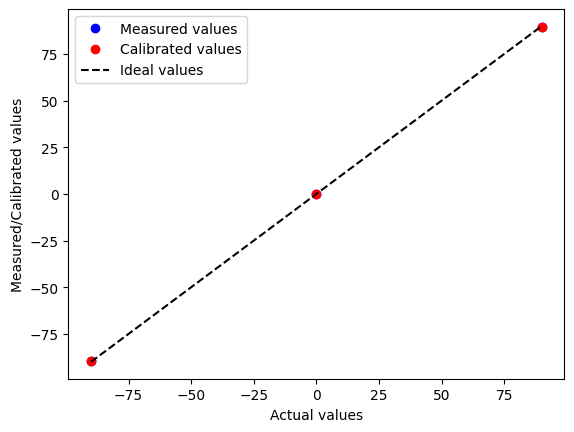

In [35]:
import numpy as np
import matplotlib.pyplot as plt 
measured_values = np.array([
    np.array(pitch_at_minus_90).astype(float) ,np.array(pitch_at_zero).astype(float), np.array(pitch_at_90).astype(float)
])
mean_measured_values = np.array([np.mean(measured_values[0]), np.mean(measured_values[1]), np.mean(measured_values[2])])
m = (mean_measured_values[2] - mean_measured_values[0]) / (90 - (-90))
b = mean_measured_values[0] - m * (-90)
print(f"Calibration equation: y = {m}x + {b}")
actual_values = np.array([-90, 0, 90])
calibrated_values = m * actual_values + b
plt.plot(actual_values, mean_measured_values, 'bo', label='Measured values')
plt.plot(actual_values, calibrated_values, 'ro', label='Calibrated values')
plt.plot(actual_values, actual_values, 'k--', label='Ideal values')
plt.xlabel('Actual values')
plt.ylabel('Measured/Calibrated values')
plt.legend()
plt.show()

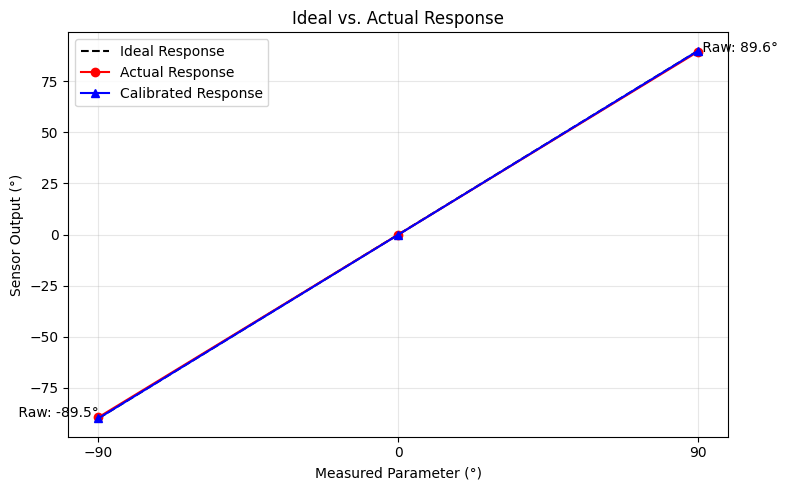

Calibration Parameters:
Raw Low: -89.48 → Reference Low: -90
Raw High: 89.59 → Reference High: 90
Raw Range: 179.07, Reference Range: 180


In [44]:
measured_values = np.array([
    np.array(pitch_at_minus_90).astype(float) ,np.array(pitch_at_zero).astype(float), np.array(pitch_at_90).astype(float)
])
actual_values = np.array([-90, 0, 90])
RawLow = np.mean(measured_values[0])  
RawHigh = np.mean(measured_values[2])  
ReferenceLow = actual_values[0]       
ReferenceHigh = actual_values[2]     
RawRange = RawHigh - RawLow
ReferenceRange = ReferenceHigh - ReferenceLow
calibrated_values = (((measured_values - RawLow) * ReferenceRange) / RawRange) + ReferenceLow

plt.figure(figsize=(8, 5))
raw_means = [np.mean(group) for group in measured_values]
calibrated_means = [np.mean(group) for group in calibrated_values]
plt.plot(actual_values, actual_values, 'k--', label='Ideal Response')
plt.plot(actual_values, raw_means, 'ro-', label='Actual Response')
plt.plot(actual_values, calibrated_means, 'b^-', label='Calibrated Response')

plt.title("Ideal vs. Actual Response")
plt.xlabel("Measured Parameter (°)")
plt.ylabel("Sensor Output (°)")
plt.xticks(actual_values)
plt.grid(True, alpha=0.3)
plt.legend()

# Annotate calibration points
plt.text(actual_values[0], raw_means[0], f' Raw: {raw_means[0]:.1f}°', ha='right')
plt.text(actual_values[-1], raw_means[-1], f' Raw: {raw_means[-1]:.1f}°', ha='left')

plt.tight_layout()
plt.show()

print(f"Calibration Parameters:")
print(f"Raw Low: {RawLow:.2f} → Reference Low: {ReferenceLow}")
print(f"Raw High: {RawHigh:.2f} → Reference High: {ReferenceHigh}")
print(f"Raw Range: {RawRange:.2f}, Reference Range: {ReferenceRange}")

In [448]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [449]:
roll_at_minus_90 = []
times_minus_90 = []
def notification_handler(uuid, byte_array):
    t_t = ble.bytearray_to_string(byte_array).split(",")
    roll_at_minus_90.append(t_t[0])
    times_minus_90.append(t_t[1])
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)
ble.send_command(CMD.SEND_DATA, "R")

In [446]:
print(len(roll_at_minus_90))

1000


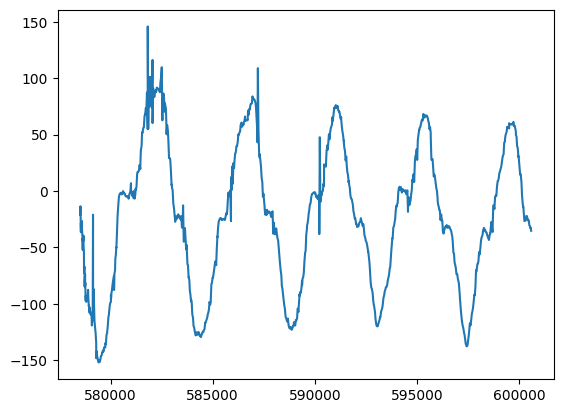

In [450]:
plt.plot(np.array(times_minus_90).astype(float), np.array(roll_at_minus_90).astype(float))

In [48]:
roll_at_zero = []
def notification_handler(uuid, byte_array):
    t_t = ble.bytearray_to_string(byte_array)
    roll_at_zero.append(t_t)
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)
ble.send_command(CMD.SEND_DATA, "R")

In [49]:
print(len(roll_at_zero))

1000


In [51]:
roll_at_90 = []
def notification_handler(uuid, byte_array):
    t_t = ble.bytearray_to_string(byte_array)
    roll_at_90.append(t_t)
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)
ble.send_command(CMD.SEND_DATA, "R")

In [52]:
print(len(roll_at_90))

1000


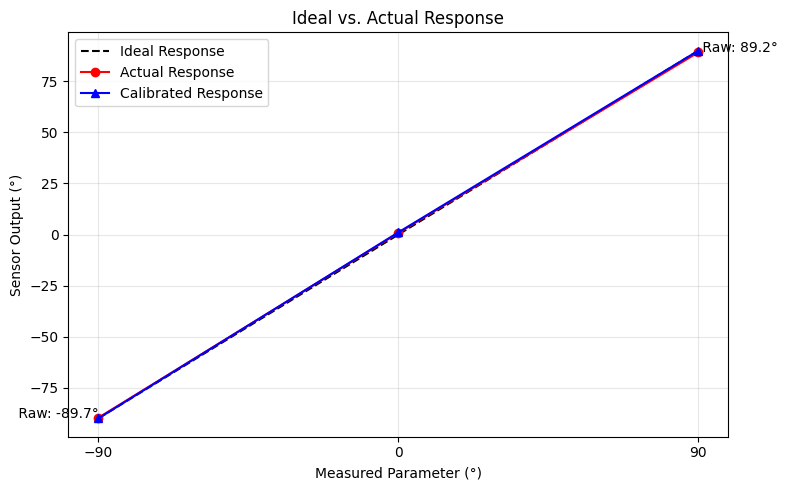

Calibration Parameters:
Raw Low: -89.71 → Reference Low: -90
Raw High: 89.20 → Reference High: 90
Raw Range: 178.91, Reference Range: 180


In [53]:
measured_values = np.array([
    np.array(roll_at_minus_90).astype(float) ,np.array(roll_at_zero).astype(float), np.array(roll_at_90).astype(float)
])
actual_values = np.array([-90, 0, 90])
RawLow = np.mean(measured_values[0])  
RawHigh = np.mean(measured_values[2])  
ReferenceLow = actual_values[0]       
ReferenceHigh = actual_values[2]     
RawRange = RawHigh - RawLow
ReferenceRange = ReferenceHigh - ReferenceLow
calibrated_values = (((measured_values - RawLow) * ReferenceRange) / RawRange) + ReferenceLow

plt.figure(figsize=(8, 5))
raw_means = [np.mean(group) for group in measured_values]
calibrated_means = [np.mean(group) for group in calibrated_values]
plt.plot(actual_values, actual_values, 'k--', label='Ideal Response')
plt.plot(actual_values, raw_means, 'ro-', label='Actual Response')
plt.plot(actual_values, calibrated_means, 'b^-', label='Calibrated Response')

plt.title("Ideal vs. Actual Response")
plt.xlabel("Measured Parameter (°)")
plt.ylabel("Sensor Output (°)")
plt.xticks(actual_values)
plt.grid(True, alpha=0.3)
plt.legend()

# Annotate calibration points
plt.text(actual_values[0], raw_means[0], f' Raw: {raw_means[0]:.1f}°', ha='right')
plt.text(actual_values[-1], raw_means[-1], f' Raw: {raw_means[-1]:.1f}°', ha='left')

plt.tight_layout()
plt.show()

print(f"Calibration Parameters:")
print(f"Raw Low: {RawLow:.2f} → Reference Low: {ReferenceLow}")
print(f"Raw High: {RawHigh:.2f} → Reference High: {ReferenceHigh}")
print(f"Raw Range: {RawRange:.2f}, Reference Range: {ReferenceRange}")

## FFT

In [161]:
results = []
def notification_handler(uuid, byte_array):
    t_t = ble.bytearray_to_string(byte_array)
    pitch, roll, time = t_t.split(",")
    results.append([time, pitch, roll])
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)
ble.send_command(CMD.FFT, "")

In [177]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [163]:
print(len(results))

343


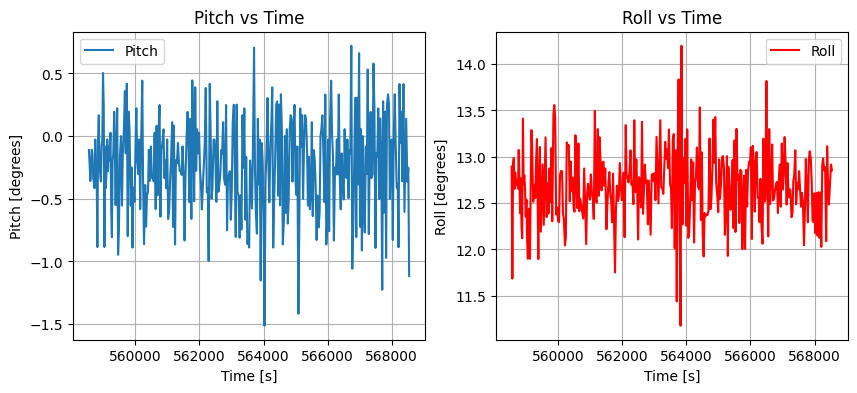

In [164]:
data_array = np.array([[float(value) for value in row] for row in results])

time = data_array[:, 0] 
pitch = data_array[:, 1] 
roll = data_array[:, 2] 
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1) 
plt.plot(time, pitch,label='Pitch')
plt.title('Pitch vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Pitch [degrees]')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(time, roll, color='r', label='Roll')
plt.title('Roll vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Roll [degrees]')
plt.grid()
plt.legend()

plt.show()

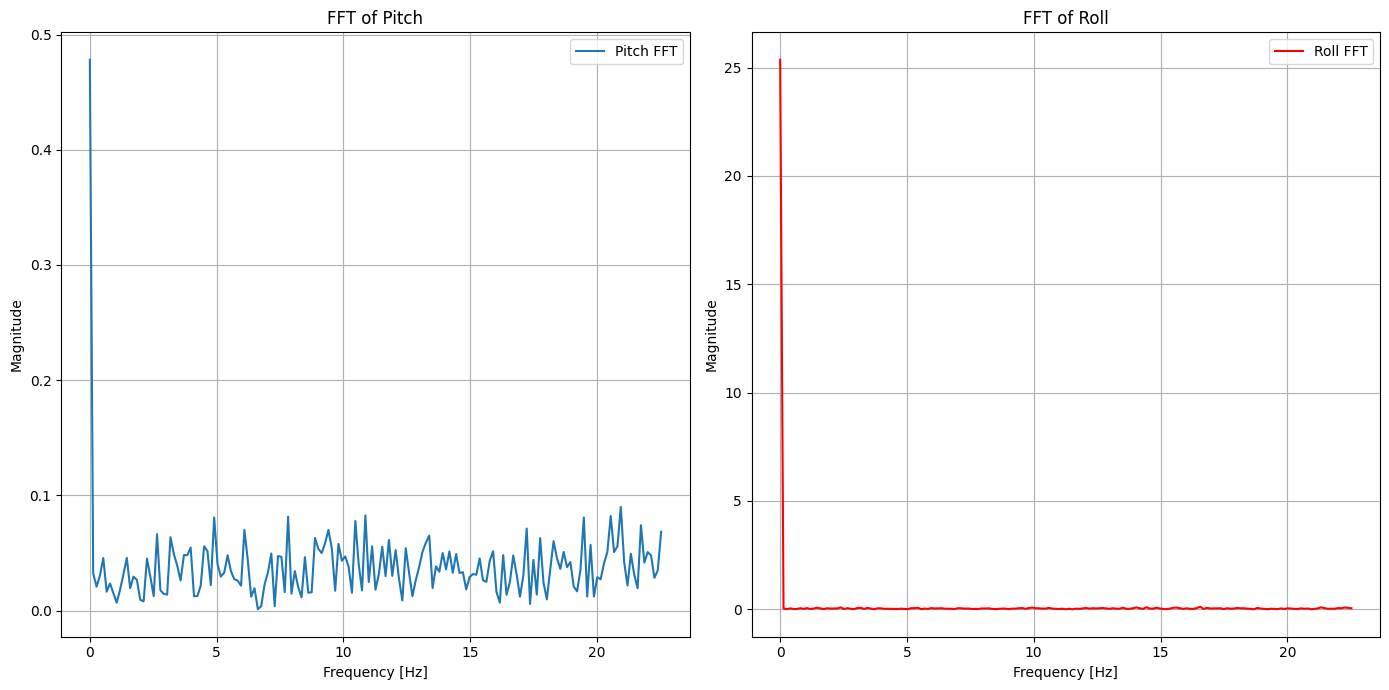

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

data_array = np.array([[float(value) for value in row] for row in results])

time = data_array[:, 0] 
pitch = data_array[:, 1] 
roll = data_array[:, 2] 

N = len(time)
T = (time[1] - time[0])/1000

pitch_fft = fft(pitch)
pitch_freqs = fftfreq(N, T)
roll_fft = fft(roll)
roll_freqs = fftfreq(N, T)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(pitch_freqs[:N // 2], 2/N*np.abs(pitch_fft)[:N // 2], label='Pitch FFT')
plt.title('FFT of Pitch')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(roll_freqs[:N // 2], 2/N*np.abs(roll_fft)[:N // 2], color='r', label='Roll FFT')
plt.title('FFT of Roll')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [171]:
## Apply Low pass Filter (try cuttoff of 5Hz)
alpha = 0.38

2025-02-10 12:09:33,003 | INFO     |: Disconnected from A1C0DD95-B611-6CFA-AF80-6BCF50487F59


In [178]:
fft_results = []
def notification_handler(uuid, byte_array):
    t_t = ble.bytearray_to_string(byte_array)
    pitch, roll, pitch_lpf, roll_lpf, time = t_t.split(",")
    fft_results.append([time, pitch, roll, pitch_lpf, roll_lpf])
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)
ble.send_command(CMD.FFT_LOW_PASS, "")

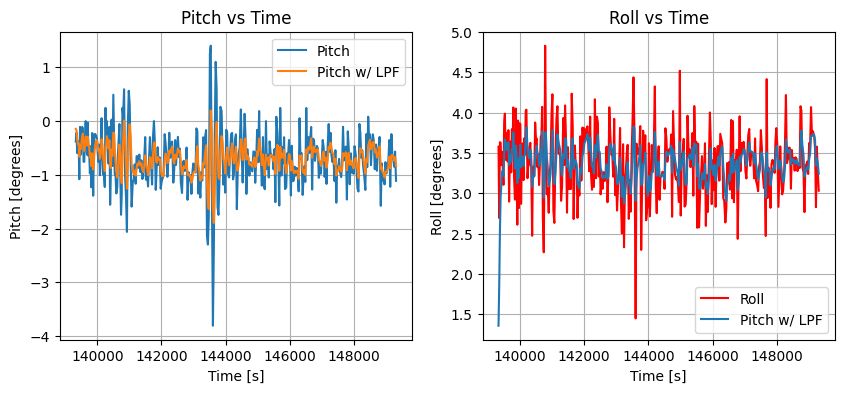

In [180]:
data_array = np.array([[float(value) for value in row] for row in fft_results])

time = data_array[:, 0] 
pitch = data_array[:, 1] 
roll = data_array[:, 2] 

pitch_lpf = data_array[:, 3]
roll_lpf = data_array[:, 4]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1) 
plt.plot(time, pitch,label='Pitch')
plt.plot(time, pitch_lpf, label='Pitch w/ LPF')
plt.title('Pitch vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Pitch [degrees]')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(time, roll, color='r', label='Roll')
plt.plot(time, roll_lpf, label='Pitch w/ LPF')
plt.title('Roll vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Roll [degrees]')
plt.grid()
plt.legend()

plt.show()

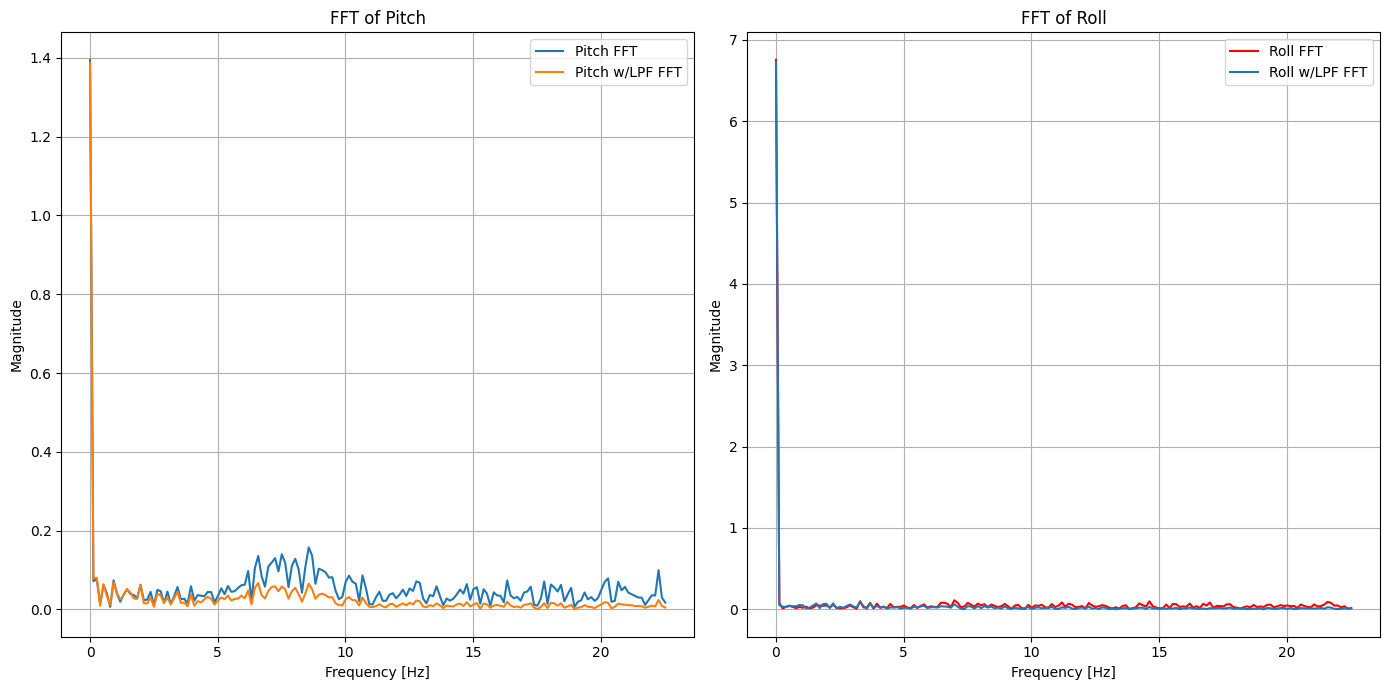

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

data_array = np.array([[float(value) for value in row] for row in fft_results])

time = data_array[:, 0] 
pitch = data_array[:, 1] 
roll = data_array[:, 2] 
pitch_lpf = data_array[:, 3]
roll_lpf = data_array[:, 4]

N = len(time)
T = (time[1] - time[0])/1000

pitch_fft = fft(pitch)
pitch_freqs = fftfreq(N, T)
roll_fft = fft(roll)
roll_freqs = fftfreq(N, T)
pitch_lpf_fft = fft(pitch_lpf)
roll_lpf_fft = fft(roll_lpf)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(pitch_freqs[:N // 2], 2/N*np.abs(pitch_fft)[:N // 2], label='Pitch FFT')
plt.plot(pitch_freqs[:N // 2], 2/N*np.abs(pitch_lpf_fft)[:N // 2], label='Pitch w/LPF FFT')
plt.title('FFT of Pitch')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(roll_freqs[:N // 2], 2/N*np.abs(roll_fft)[:N // 2], color='r', label='Roll FFT')
plt.plot(roll_freqs[:N // 2], 2/N*np.abs(roll_lpf_fft)[:N // 2], label='Roll w/LPF FFT')
plt.title('FFT of Roll')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## Gyroscope

In [455]:
gyr_results = []
def notification_handler(uuid, byte_array):
    t_t = ble.bytearray_to_string(byte_array)
    gy_pitch, gy_roll, gy_yaw, pitch, roll, pitch_lpf, roll_lpf, time = t_t.split(",")
    gyr_results.append([time, pitch, roll, pitch_lpf, roll_lpf, gy_pitch, gy_roll, gy_yaw])
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)
ble.send_command(CMD.GYR, "")

In [456]:
ble.stop_notify(ble.uuid['RX_STRING'])

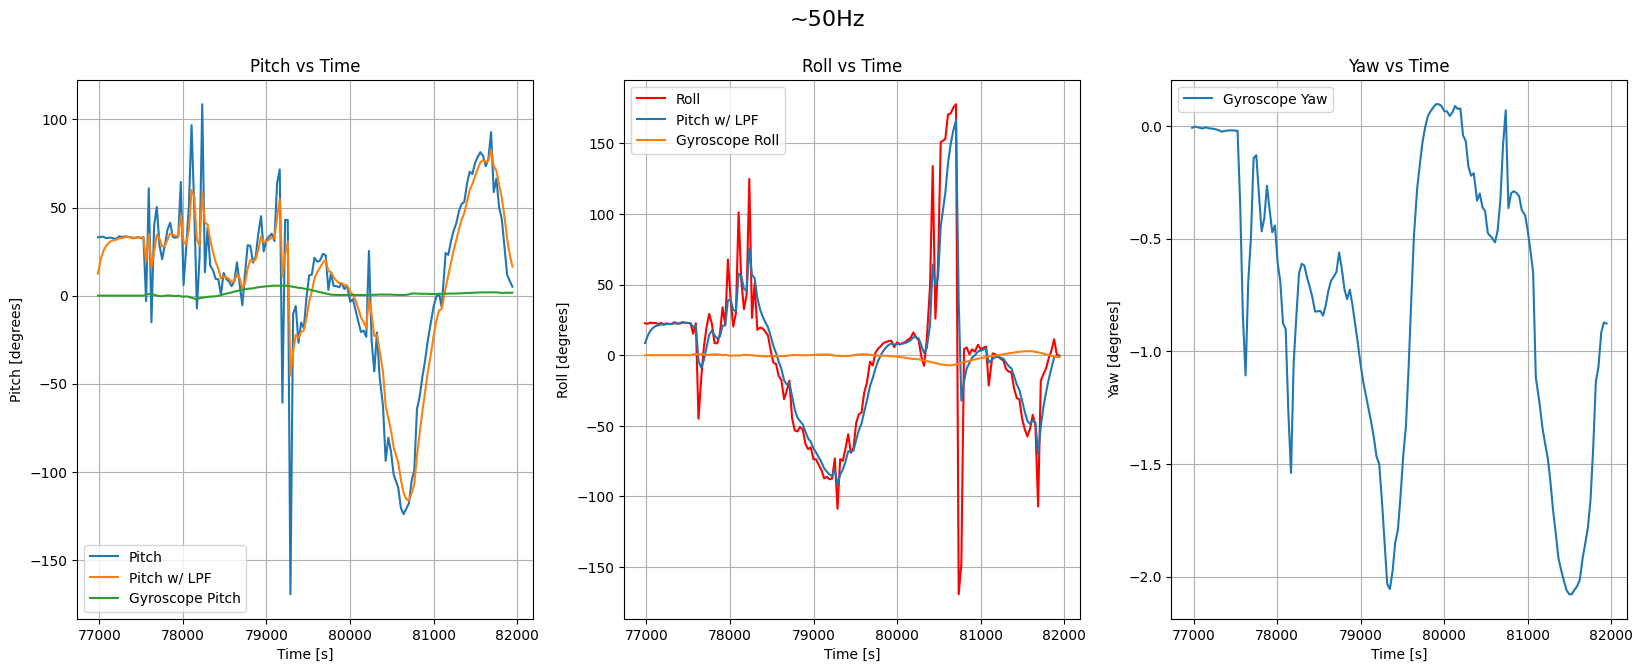

2025-02-11 01:29:18,529 | INFO     |: Disconnected from A1C0DD95-B611-6CFA-AF80-6BCF50487F59


In [457]:
data_array = np.array([[float(value) for value in row] for row in gyr_results])

time = data_array[:, 0] 
pitch = data_array[:, 1] 
roll = data_array[:, 2] 

pitch_lpf = data_array[:, 3]
roll_lpf = data_array[:, 4]

gy_pitch = data_array[:, 5]
gy_roll = data_array[:, 6]
gy_yaw = data_array[:, 7]

plt.figure(figsize=(20, 7))
plt.suptitle('~50Hz', fontsize=16)

plt.subplot(1, 3, 1) 
plt.plot(time, pitch,label='Pitch')
plt.plot(time, pitch_lpf, label="Pitch w/ LPF")
plt.plot(time, gy_pitch, label= "Gyroscope Pitch")
plt.title('Pitch vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Pitch [degrees]')
plt.grid()
plt.legend()

plt.subplot(1, 3, 2) 
plt.plot(time, roll, color='r', label='Roll')
plt.plot(time, roll_lpf, label='Pitch w/ LPF')
plt.plot(time, gy_roll, label="Gyroscope Roll")
plt.title('Roll vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Roll [degrees]')
plt.grid()
plt.legend()


plt.subplot(1, 3, 3) 
plt.plot(time, gy_yaw, label="Gyroscope Yaw")
plt.title('Yaw vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Yaw [degrees]')
plt.grid()
plt.legend()
plt.show()

## Complimentary Filter

In [409]:
comp_results = []
def notification_handler(uuid, byte_array):
    t_t = ble.bytearray_to_string(byte_array)
    gy_pitch, gy_roll, pitch, roll, pitch_lpf, roll_lpf, comp_pitch, comp_roll, time = t_t.split(",")
    comp_results.append([time, pitch, roll, pitch_lpf, roll_lpf, gy_pitch, gy_roll, comp_pitch, comp_roll])
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)
ble.send_command(CMD.COMP, "")

In [410]:
ble.stop_notify(ble.uuid['RX_STRING'])

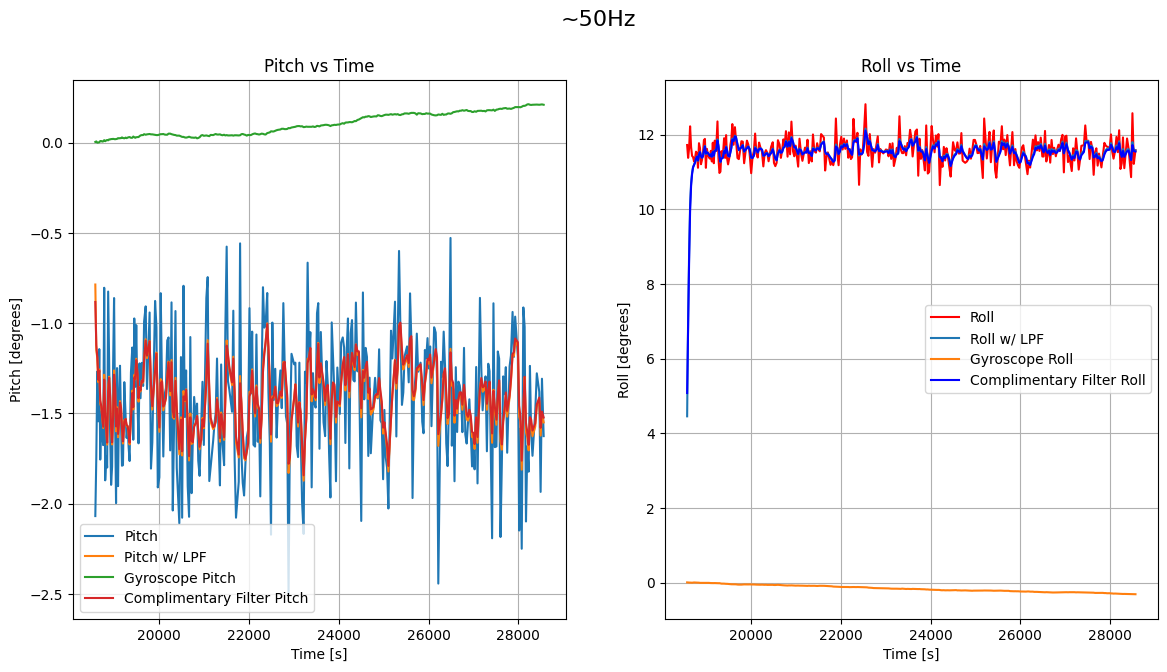

In [411]:
data_array = np.array([[float(value) for value in row] for row in comp_results])

time = data_array[:, 0] 
pitch = data_array[:, 1] 
roll = data_array[:, 2] 

pitch_lpf = data_array[:, 3]
roll_lpf = data_array[:, 4]

gy_pitch = data_array[:, 5]
gy_roll = data_array[:, 6]

comp_pitch = data_array[:, 7]
comp_roll = data_array[:, 8]

plt.figure(figsize=(14, 7))
plt.suptitle('~50Hz', fontsize=16)

plt.subplot(1, 2, 1) 
plt.plot(time, pitch,label='Pitch')
plt.plot(time, pitch_lpf, label="Pitch w/ LPF")
plt.plot(time, gy_pitch, label= "Gyroscope Pitch")
plt.plot(time, comp_pitch, label='Complimentary Filter Pitch')
plt.title('Pitch vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Pitch [degrees]')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(time, roll, color='r', label='Roll')
plt.plot(time, roll_lpf, label='Roll w/ LPF')
plt.plot(time, gy_roll, label="Gyroscope Roll")
plt.plot(time, comp_roll, color='b' ,label='Complimentary Filter Roll')
plt.title('Roll vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Roll [degrees]')
plt.grid()
plt.legend()
plt.show()

## Sample Data

In [422]:
## Speed of sampling
imu_results = []
def notification_handler(uuid, byte_array):
    t_t = ble.bytearray_to_string(byte_array)
    pitch_a, roll_a, pitch_g, roll_g, yaw_g, comp_pitch, comp_roll, time = t_t.split(",")
    imu_results.append(time)
    print(f"Accelerometer : [{pitch_a}, {roll_a}] ,  Gyroscope: [{pitch_g}, {roll_g}, {yaw_g}], Complimnetary Filter : [{comp_pitch}, {comp_roll}]")
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)
ble.send_command(CMD.SEND_IMU_DATA, "")

Accelerometer : [0.000, 0.000] ,  Gyroscope: [0.000, 0.000, 0.000], Complimnetary Filter : [0.000, 0.000]
Accelerometer : [-1.990, 8.806] ,  Gyroscope: [-0.000, 0.001, 0.000], Complimnetary Filter : [-0.000, 0.000]
Accelerometer : [-1.368, 9.386] ,  Gyroscope: [0.000, 0.002, 0.000], Complimnetary Filter : [-0.000, 0.001]
Accelerometer : [-1.211, 9.520] ,  Gyroscope: [0.002, 0.003, 0.003], Complimnetary Filter : [0.000, 0.003]
Accelerometer : [-1.160, 9.283] ,  Gyroscope: [-0.003, -0.002, 0.019], Complimnetary Filter : [0.002, 0.003]
Accelerometer : [-1.590, 9.564] ,  Gyroscope: [-0.001, -0.006, 0.009], Complimnetary Filter : [-0.002, -0.002]
Accelerometer : [-1.177, 9.444] ,  Gyroscope: [-0.001, -0.006, 0.007], Complimnetary Filter : [-0.001, -0.006]
Accelerometer : [-0.904, 8.812] ,  Gyroscope: [-0.001, 0.001, -0.008], Complimnetary Filter : [-0.001, -0.006]
Accelerometer : [-1.316, 9.088] ,  Gyroscope: [-0.001, 0.002, -0.012], Complimnetary Filter : [-0.001, 0.001]
Accelerometer : [-

In [413]:
print(len(imu_results))

1000


In [417]:
print((float(imu_results[-1])-float(imu_results[0]))/1000)

2.635
2025-02-10 21:38:54,508 | INFO     |: Disconnected from A1C0DD95-B611-6CFA-AF80-6BCF50487F59


In [423]:
print(len(imu_results))

1677


In [424]:
print((float(imu_results[-1])-float(imu_results[0]))/1000)

5.003
2025-02-10 22:28:49,096 | INFO     |: Disconnected from A1C0DD95-B611-6CFA-AF80-6BCF50487F59
